In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train = train.drop('id', axis=1)
test = pd.read_csv('test.csv')
original = pd.read_csv('original.csv')

In [16]:
train.sample(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
329954,46494.40,0.067,733,2687.91,12.22,Female,Married,High School,Employed,Other,C4,1.0
418789,43761.69,0.099,629,6161.18,13.74,Male,Single,Bachelor's,Employed,Debt consolidation,D2,1.0
259556,61618.38,0.107,661,13359.48,11.69,Male,Divorced,Bachelor's,Retired,Debt consolidation,D1,1.0
386812,37388.10,0.084,714,2585.13,10.72,Female,Single,High School,Employed,Debt consolidation,C3,1.0
319232,29198.13,0.093,807,12243.94,11.20,Female,Married,High School,Employed,Business,A5,1.0


In [3]:
original.sample(5)

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
10373,50,Female,Single,Bachelor's,6000.00,500.00,Employed,0.251,570,28333.77,...,36,958.78,F2,5,10115.20,2314.65,3,0,3,1
8573,31,Male,Married,High School,48346.30,4028.86,Employed,0.098,587,10518.36,...,60,246.60,E3,6,65300.67,22437.89,2,0,2,1
17307,66,Female,Married,Bachelor's,28146.46,2345.54,Employed,0.195,698,9818.41,...,36,326.96,C2,5,39342.56,31819.18,1,0,1,1
3642,50,Female,Married,Master's,14366.02,1197.17,Self-employed,0.308,719,13068.81,...,36,423.23,C2,0,19952.78,12713.10,3,0,3,1
15677,59,Male,Divorced,Bachelor's,104886.57,8740.55,Employed,0.113,744,19364.62,...,36,633.15,B3,6,80952.55,64989.77,0,0,1,1


In [19]:
# mutual information
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

X = train.copy()
y = X.pop('loan_paid_back')

for col in X.select_dtypes(['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

employment_status       0.175941
debt_to_income_ratio    0.079401
credit_score            0.033769
grade_subgrade          0.026769
loan_amount             0.012670
interest_rate           0.011920
annual_income           0.011441
loan_purpose            0.000331
education_level         0.000325
gender                  0.000028
marital_status          0.000003
Name: MI Scores, dtype: float64

<Axes: xlabel='employment_status', ylabel='count'>

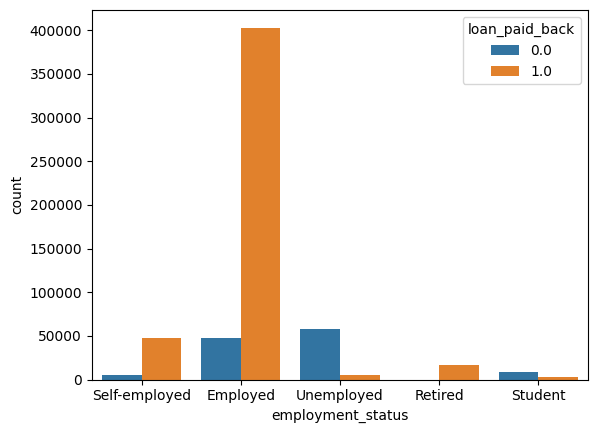

In [22]:
sns.countplot(data=train, x='employment_status', hue='loan_paid_back')

<Axes: xlabel='loan_paid_back', ylabel='debt_to_income_ratio'>

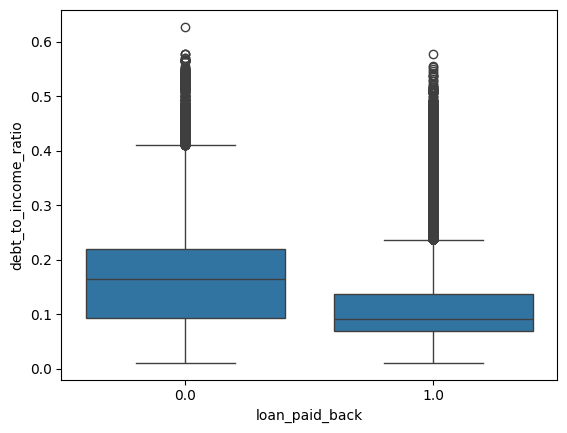

In [24]:
sns.boxplot(data=train, x='loan_paid_back', y='debt_to_income_ratio')

<Axes: xlabel='loan_paid_back', ylabel='credit_score'>

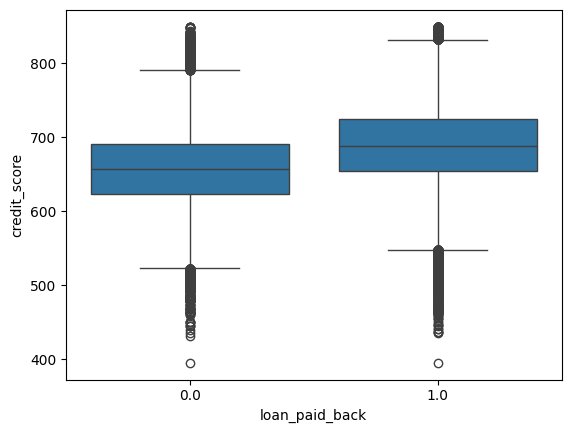

In [25]:
sns.boxplot(data=train, x='loan_paid_back', y='credit_score')

In [5]:
# difference between original data set and this competition
print(set(original.columns) - set(train.columns))
print(set(train.columns) - set(original.columns))

{'num_of_delinquencies', 'installment', 'delinquency_history', 'monthly_income', 'current_balance', 'total_credit_limit', 'public_records', 'age', 'num_of_open_accounts', 'loan_term'}
set()


In [7]:
original.drop(columns=['num_of_delinquencies', 'installment', 'delinquency_history', 'monthly_income', 'current_balance', 'total_credit_limit', 'public_records', 'age', 'num_of_open_accounts', 'loan_term'])

,gender,marital_status,education_level,annual_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,loan_purpose,interest_rate,grade_subgrade,loan_paid_back
0,Male,Married,Master's,24240.19,Employed,0.074,743,17173.72,Car,13.39,B5,1
1,Female,Married,Bachelor's,20172.98,Employed,0.219,531,22663.89,Debt consolidation,17.81,F1,1
2,Female,Single,High School,26181.80,Employed,0.234,779,3631.36,Business,9.53,B4,1
3,Female,Single,High School,11873.84,Employed,0.264,809,14939.23,Other,7.99,A5,1
4,Other,Single,Other,25326.44,Employed,0.260,663,16551.71,Car,15.20,D5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,Married,Bachelor's,39640.08,Employed,0.275,691,16322.23,Debt consolidation,15.05,C5,0
19996,Female,Married,Bachelor's,32062.90,Employed,0.367,758,16697.34,Debt consolidation,11.89,B5,1
19997,Female,Single,Master's,18642.02,Student,0.106,751,23924.78,Debt consolidation,10.06,B4,1
19998,Male,Married,Master's,22181.39,Retired,0.275,646,16920.13,Other,16.06,D2,1
